In [1]:
import os
import datetime
import time

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<IPython.core.display.Javascript object>


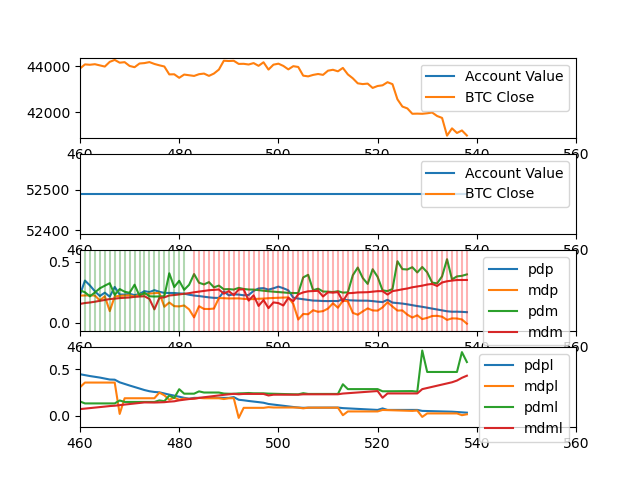

interactive(children=(FloatSlider(value=479.0, description='w', max=484.0, step=10.0), Output()), _dom_classes…

<function __main__.update(w)>

In [2]:
%matplotlib notebook
from ipywidgets import *

def update(w):
    x = 100
    w = int(w)
    ax1.set_xlim(w, w + x)
    ax2.set_xlim(w, w + x)
    ax3.set_xlim(w, w + x)
    ax4.set_xlim(w, w + x)
#     ax5.set_xlim(w, w + x)
    bottom_c = min(df['Close'].values.tolist()[w:w+x]) - 100
    top_c = max(df['Close'].values.tolist()[w:w+x]) + 100
    ax1.set_ylim(bottom_c, top_c)
    bottom_v = min(df['Account Value'].values.tolist()[w:w+x]) - 100
    top_v = max(df['Account Value'].values.tolist()[w:w+x]) + 100
    ax2.set_ylim(bottom_v, top_v)

csv_path = "RT_test.csv"

df = pd.read_csv(csv_path)

nb_subplot = 4

ax1 = plt.subplot(nb_subplot,1,1)
# ax1.set_yscale("log")
ax1.plot(df['Account Value'], label = "Account Value")
# ax1.plot(df['High'], label = "BTC High")
# ax1.plot(df['Low'], label = "BTC Low")
ax1.plot(df['Close'], label = "BTC Close")
for i, e in enumerate(df['Action']):
    if e == "SELL":
        ax1.axvline(x=i, color="red", alpha=0.3)
    elif e == "BUY":
        ax1.axvline(x=i, color="green", alpha=0.3)
    elif e == "RESET":
        ax1.axvline(x=i, color="yellow", alpha=0.3)
plt.legend()

ax2 = plt.subplot(nb_subplot,1,2)
# ax1.set_yscale("log")
ax2.plot(df['Account Value'], label = "Account Value")
# ax1.plot(df['High'], label = "BTC High")
# ax1.plot(df['Low'], label = "BTC Low")
ax2.plot(df['Close'], label = "BTC Close")
for i, e in enumerate(df['Action']):
    if e == "SELL":
        ax1.axvline(x=i, color="red", alpha=0.3)
    elif e == "BUY":
        ax1.axvline(x=i, color="green", alpha=0.3)
    elif e == "RESET":
        ax1.axvline(x=i, color="yellow", alpha=0.3)
plt.legend()

ax3 = plt.subplot(nb_subplot,1,3)
# pdp = [max(df['dpp'][curr],df['dppp'][curr]) for curr in range(len(df))]
# mdp = [min(df['dpp'][curr],df['dppp'][curr]) for curr in range(len(df))]
# pdm = [max(df['dmp'][curr],df['dmpp'][curr]) for curr in range(len(df))]
# mdm = [min(df['dmp'][curr],df['dmpp'][curr]) for curr in range(len(df))]
# pdpl = [max(df['dppl'][curr],df['dpppl'][curr]) for curr in range(len(df))]
# mdpl = [min(df['dppl'][curr],df['dpppl'][curr]) for curr in range(len(df))]
# pdml = [max(df['dmpl'][curr],df['dmppl'][curr]) for curr in range(len(df))]
# mdml = [min(df['dmpl'][curr],df['dmppl'][curr]) for curr in range(len(df))]
pdp = df['pdp']
mdp = df['mdp']
pdm = df['pdm']
mdm = df['mdm']
pdpl = df['pdpl']
mdpl = df['mdpl']
pdml = df['pdml']
mdml = df['mdml']
ax3.plot(pdp, label = "pdp")
ax3.plot(mdp, label = "mdp")
ax3.plot(pdm, label = "pdm")
ax3.plot(mdm, label = "mdm")
    
for i in range(len(df)):
    if pdpl[i] > mdml[i]:
        if pdp[i] > mdm[i]:
            ax3.axvline(x=i, color="green", alpha=0.3)
        if pdp[i] < mdm[i] and abs(pdp[i] - mdm[i]) > 0.02:
            ax3.axvline(x=i, color="red", alpha=0.3)
    elif mdpl[i] < pdml[i]:
        if mdp[i] > pdm[i]:
            ax3.axvline(x=i, color="green", alpha=0.3)
        if mdp[i] < pdm[i]:
            ax3.axvline(x=i, color="red", alpha=0.3)
        
plt.legend()

ax4 = plt.subplot(nb_subplot,1,4)
# pdpl = [max(df['dppl'][curr],df['dpppl'][curr]) for curr in range(len(df))]
# mdpl = [min(df['dppl'][curr],df['dpppl'][curr]) for curr in range(len(df))]
# pdml = [max(df['dmpl'][curr],df['dmppl'][curr]) for curr in range(len(df))]
# mdml = [min(df['dmpl'][curr],df['dmppl'][curr]) for curr in range(len(df))]
pdpl = df['pdpl']
mdpl = df['mdpl']
pdml = df['pdml']
mdml = df['mdml']
ax4.plot(pdpl, label = "pdpl")
ax4.plot(mdpl, label = "mdpl")
ax4.plot(pdml, label = "pdml")
ax4.plot(mdml, label = "mdml")
# for i in range(len(df)):
#     if pdpl[i] > mdml[i]:
#         ax4.axvline(x=i, color="green", alpha=0.3)
#     elif mdpl[i] < pdml[i]:
#         ax4.axvline(x=i, color="red", alpha=0.3)
plt.legend()

interact(update, w = widgets.FloatSlider(value=len(df)-60, min=0, max=len(df)-55, step=10))